# Lecture 21 - Large Language Models (Part 2)

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_21-LLMs/Lecture_21-LLMs.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2025-Applied-Data-Science-with-Python/blob/main/docs/Lectures/Theme_3-Model_Engineering/Lecture_21-LLMs/Lecture_21-LLMs.ipynb)

<a id='top'></a>

- [21.1 Introduction to LLMs](#21.1-introduction-to-llms)
  - [21.1.1 Architecture of Large Language Models](#21.1.1-architecture-of-large-language-models)
  - [21.1.2 Variants of Transformer Network Architectures](#21.1.2-variants-of-transformer-network-architectures)
- [21.2 Creating LLMs](#21.2-creating-llms)
  - [21.2.1 Pretraining](#21.2.1-pretraining)
  - [21.2.2 Supervised Finetuning](#21.2.2-supervised-finetuning)
  - [21.2.3 Alignment ](#21.2.3-alignment)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2

/content/drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2


In [ ]:
cd images

/content/drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images


In [ ]:
ls

Embedding_space.png  VLM_capabilities.jpg


## 22.2 Vision-Language Models

**Vision Language Models (VLMs)** are multimodal systems that jointly process and reason over visual (images, videos) and linguistic (text) information. By integrating these two modalities, VLMs enable machines to understand and communicate about visual scenes using natural language.

VLMs take both an image and its textual description as input and generate a text output. Building datasets for such models requires large scale collection of image and corresponding text, typically in the form of captions or descriptive phrases. Several very large such datasets exist that have been essential for training of modern VLMs, and contain billions of image-text pairs, with descriptions in English and other languages. For instance, [LAION-5B](https://laion.ai/blog/laion-5b/) dataset has over 5.8 billion image-text examples.

During training, a VLM learns to map visual and textual representations into a shared embedding space. This alignment allows the model to associate visual features (shapes, colors, spatial relations) with linguistic concepts, enabling it to generalize to a wide range of vision tasks and perform zero-shot inference on unseen examples.

VLMs can perform various multimodal tasks including:

- Image and video captioning or summarization: generate context-aware descriptions of images or video frames.
- Visual Question Answering (VQA): answer open-ended questions based  on visual content.
- Image-based reasoning: provide explanations or logical reasoning about visual scenes.
- Multimodal dialogues: engage in conversations involving visual inputs.
- Text-to-image search: retrieve images, figures, or diagrams in documents that match a textual query.
- Image generation: generate new images based on textual prompts.

The example below illustrates VLMs performing tasks such as object localization, segmentation, visual question answering, and image learning via instructions. These models not only interpret the semantic content of images, but can also understand spatial relations in images, such as identifying relative positions of objects, generating segmentation masks, outputing bounding boxes of objects.

<img src="drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images/VLM_capabilities.jpg" width="450">

*Figure: VLM prompts and responses.* Source: [1].

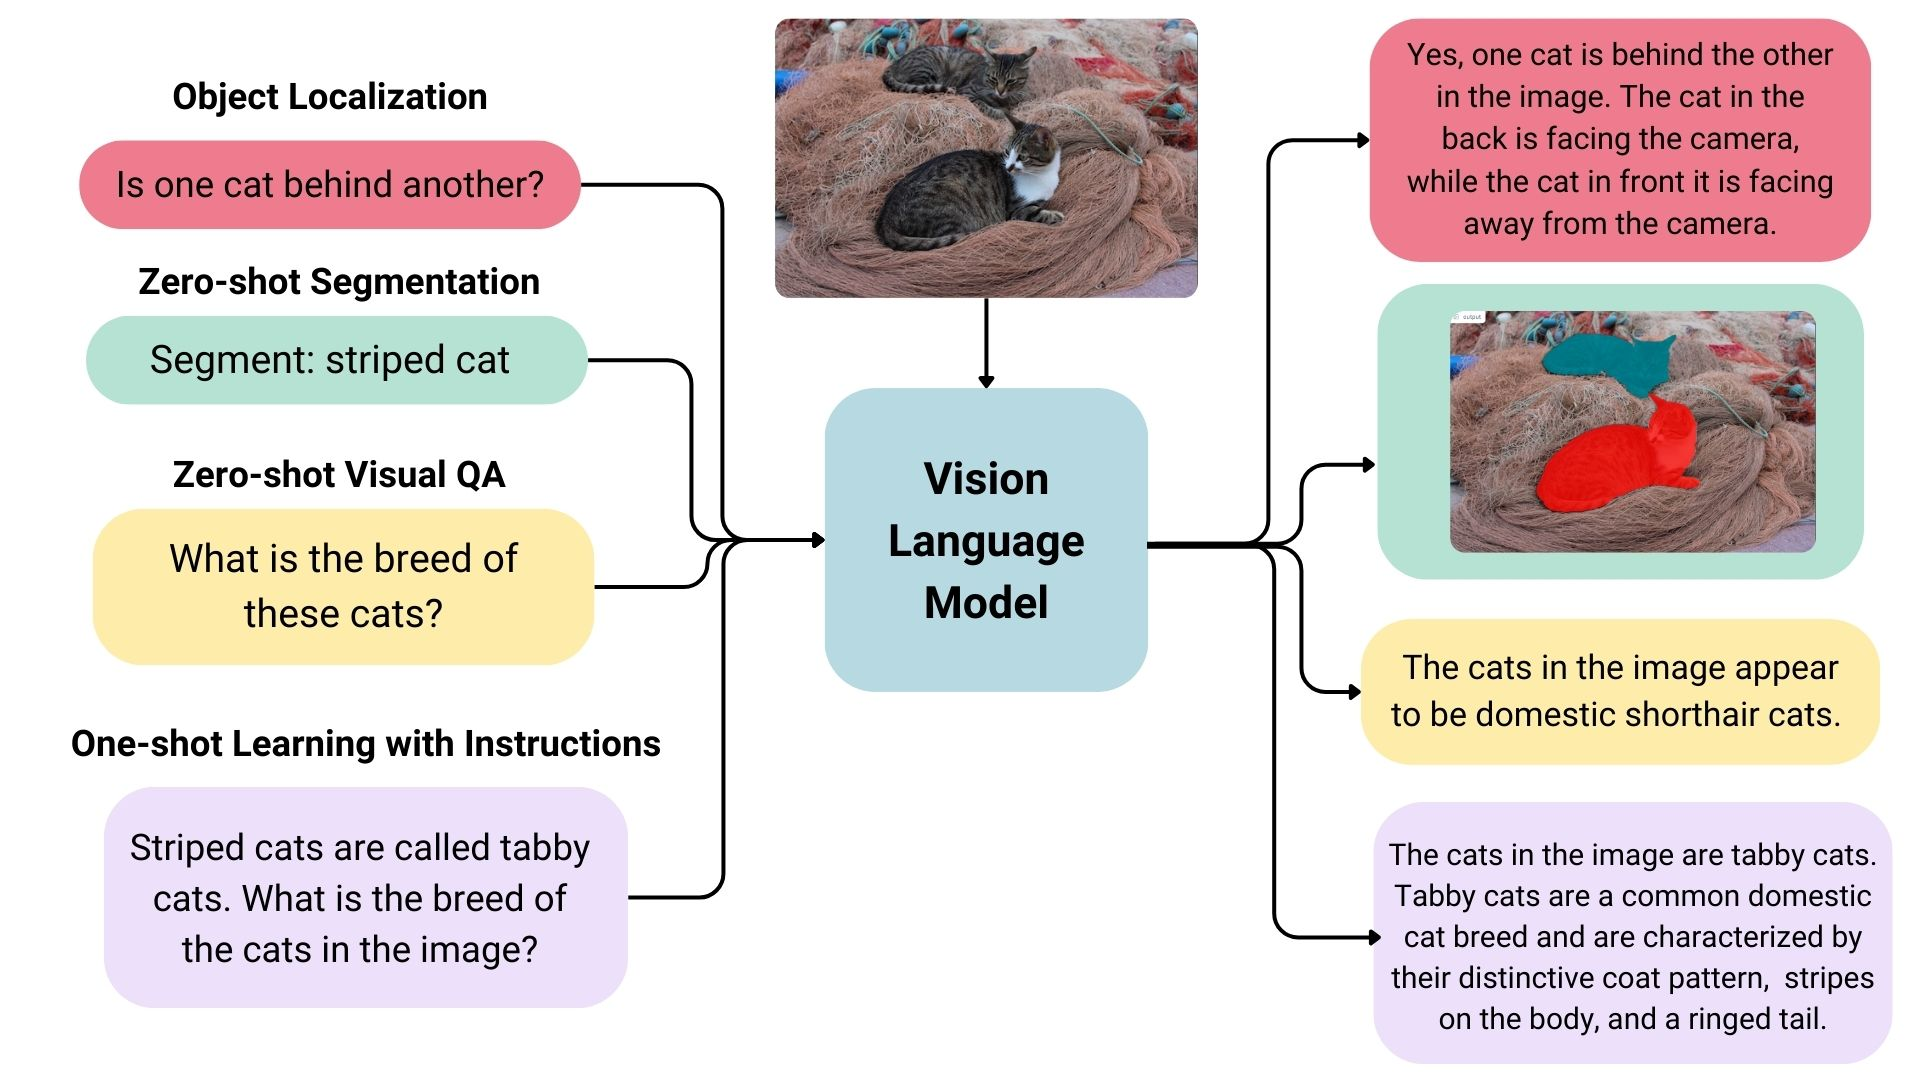

In [ ]:
from IPython.display import Image, display
display(Image(filename="/content/drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images/VLM_capabilities.jpg", width=850))

### 22.2.1 VLM Workflow

Despite differences among architectures, most VLMs share a similar workflow depicted in the figure.

<img src="drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images/vlm_architecture.png" width="450">

*Figure: A common VLM worklow.* Source: [3].

**Multimodal inputs**. Input modalities in VLMs include *visual inputs* (images, pdf documents, videos) and *textual inputs* (captions, question-answer pairs, instuctions).

**Encoding Modalities.** A *vision encoder* transforms the visual input into numerical representations, known as visual embeddings. Vision encoder in VLMs is commonly a Vision Transformer (ViT) or a Convolutional Neural Network (CNNs). A *text encoder* converts textual prompts into numerical representations, i.e., textual embeddings. Text encoder is typically a pretrained LLM, such as LLaMA, Mistral, or Qwen.

**Projection and fusion into a joint embeddings space.** The visual and textual embedding are next aligned into a shared embedding space. This is done by a *projector layer* (a.k.a., fusion layer), which is usually a small Transformer block or a fully-connected neural network (MLP). The projector layer merges the visual and textual embeddings into a joint representation, enabling the VLM to reason simultaneously across images and language.

**Autoregressive multimodal decoding.** The combined multimodal embeddings are passed to a *text decoder*, which generates a textual response one token at a time. Each new token is conditioned on previously generated tokens and multimodal embeddings.

<img src="drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images/mutitmodal_decoding.jpg" width="450">


The shared embedding space enables VLMs to link textual concepts (e.g., cat) with corresponding visual evidence (color, position), allowing reasoning about both language and vision simultaneously. For instance, the model understands "cat" not just as a word, but as a visual object in the image.

Training a VLM typically involves multiple stages of alignment and fusion between pretrained encoders. A common approach begins with frozen visual and textual encoders, while a projector layer is trained to align their embedding spaces. In later stages, fine-tuning adjusts selected components (e.g., the text encoder and projector) for improved multimodal reasoning. Although this way of training VLMs has been common, many VLMs adopt variations of this procedure, in order to balance efficiency and task-specific performance.

### 22.2.2 Representative VLM Models

CLIP (Contrastive Language-Image Pretraining) is an early model that introduced vision-language alignment and it has been used extensively as a vision encoder in VLMs for multimodal fusion. CLIP employs contrastive learning to associate visual and textual content by maximizing similarity score between matched image and text embeddings and minimizing it for mismatched ones. In the figure below, an image encoder outputs image embeddings $I_1, I_2, ..., I_N$, and a text encoder outputs text embeddings $T_1, T_2, ..., T_M$. The model computes the similarities between text and image embeddings to align them into a combined embeddings space $I_i T_j$.

<img src="drive/My Drive/Data_Science_Course/Fall_2025/Lectures/Lecture_22-LLMs_2/images/CLIP.png" width="450">

*Figure: CLIP architecture.* Source: [4].

Subsequent models, including BLIP and Flamingo, introduced cross-attention mechanisms that enable efficient few-shot multimodal reasoning.

More recent models such as Gemini 2.5 Pro (Google), GPT-5 (OpenAI), Claude Opus 4 (Anthropic), Qwen-VL Max (Alibaba), and Mistral 3.1 (Mistral AI) demonstrate advanced visual comprehension, reasoning, and dialogic capabilities.

Aslo, there are many open-source VLM alternatives that have made the functionality widely accessible, and include LLaVA 1.6, Qwen-VL, LLaMA 3.2 Vision, InternVL, Pixtral, and others.

#### Benchmarking VLMs

Performance of VLMs is assessed using multimodal benchmarks, which evaluate mnodels on a variety of tasks, such as reasoning, visual quesiton answering, document comprehension, video understanding, and other tasks. Most benchmarks consist of a set of images with associated questions, often posed as multiple-choice questions. Popular benchmarks are [MMMU](https://mmmu-benchmark.github.io/), [Video-MME](https://video-mme.github.io/home_page.html), [MathVista](https://mathvista.github.io/), and [ChartQA](https://github.com/vis-nlp/ChartQA). MMMU is the most comprehensive benchmark, and contains 11.5K multimodal challenges that require knowledge and reasoning across different disciplines such as arts and engineering.

Several VLM-specific leaderboards provide comparative rankings across diverse metrics. [Vision Arena](https://lmarena.ai/leaderboard/vision) is based on anonymous voting of model outputs by human preferences. [Open VLM Leaderboard](https://huggingface.co/spaces/opencompass/open_vlm_leaderboard) provides comparative ranking of VLMs according to different metrics and average scores.

#### Importance

Traditional computer vision (CV) models are constrained to a predefined and fixed set of categories or objects for image classification or object detection (e.g., identify whether an image contains a cat or a dog). Also, these tasks requires the users to manually label  a large number of images with a specific category or assign bounding boxes to multiple objects in every image, which is a time-consuming and expensive process. Conversely, VLMs are trained with more detailed textual descriptions of images, where for example an image can contain both cats, dogs, and other objects, as well as, the text description can provide contextual information (e.g., the cat is sitting, the dog is running). Learning from rich natural-language descriptions allows VLMs to better understand visual scenes, without limiting the learning to a limited set of categories and objects. Also, it eliminates the need for exhaustive labeling and extends their utility beyond traditional CV tasks like classification or detection to new tasks including reasoning, summarization, question answering, and interactive dialogue, by simply changing the text prompt.

VLMs have been applied across many domains and industries, and offer great potential for enhancing visual perception. For instance, they can be used review videos and extract insights in industrial inspection and robotics (detect faults, monitor operations, identify anomalies in real time), safety and infrastructure monitoring (recognize floods, fires, or traffic hazards), retail and logistics (track empty shelves, detect misplaced items, identify supply-chain bottlenecks), and other tasks.

### 2.2.3 Finetuning an VLM

We are excited to announce that TRL’s SFTTrainer now includes experimental support for Vision Language Models! We provide an example here of how to perform SFT on a Llava 1.5 VLM using the llava-instruct dataset which contains 260k image-conversation pairs. The dataset contains user-assistant interactions formatted as a sequence of messages. For example, each conversation is paired with an image that the user asks questions about.

## References <a name='references'></a>

1. Vision Language Models Explained - Hugging Face Blog, by Merve,
Edward Beeching, available at [https://huggingface.co/blog/vlms](https://huggingface.co/blog/vlms).
2. Understanding Vision-Language Models (VLMs): A Practical Guide, by Pietro Bolcato, available at [https://medium.com/@pietrobolcato/understanding-vision-language-models-vlms-a-practical-guide-8da18e9f0e0c](https://medium.com/@pietrobolcato/understanding-vision-language-models-vlms-a-practical-guide-8da18e9f0e0c).
3. What Are Vision Language Models, by NVIDIA, available at [https://www.nvidia.com/en-us/glossary/vision-language-models/](https://www.nvidia.com/en-us/glossary/vision-language-models/).
4. CLIP: Connecting text and images, OpenAI, available at [https://openai.com/index/clip/](https://openai.com/index/clip/).